##### Q-7: Do winter driving conditions lead to more multi-car collisions?
* Compute the rate of multi car collisions as the proportion of the number of collisions involving 3 or more cars to the total number of collisions for each month of 2017. 
* Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in January than in May.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [5]:
FILE_NAME = '../NYPD_Motor_Vehicle_Collisions.csv'
master_df = pd.read_csv(FILE_NAME)

In [6]:
column_list = master_df.columns
relatedColumns_list = []
relatedColumns_list = list(column_list[-5:])
relatedColumns_list.append('DATE')
# type(relatedColumns_list)

In [7]:
focus_df = master_df[relatedColumns_list]
focus_df.head()

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATE
0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,04/30/2019
1,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN,04/30/2019
2,Sedan,NaN,NaN,NaN,NaN,04/30/2019
3,COMMU,Sedan,NaN,NaN,NaN,04/30/2019
4,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,04/30/2019


Compute the rate of multi car collisions as the proportion of 
*  the number of collisions involving 3 or more cars <br>
>  to the total number of collisions for each month of 2017. 

In [8]:
focus_df['year'] = [ date[-4:] for date in focus_df['DATE']]
focus_df = focus_df.loc[
    focus_df['year'] == '2017'
]

In [9]:
focus_df['month'] = [ date[:2] for date in focus_df['DATE']]

In [10]:
# add a new column 
focus_df['yearmonth'] = [
    str(year + '-' + month) for year,month in
    zip(focus_df['year'], focus_df['month'])
]

In [11]:
focus_df.head()

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATE,year,month,yearmonth
297563,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,12/15/2017,2017,12,2017-12
297778,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,12/31/2017,2017,12,2017-12
297898,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,12/31/2017,2017,12,2017-12
297923,BU,NaN,NaN,NaN,NaN,11/23/2017,2017,11,2017-11
298070,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,11/17/2017,2017,11,2017-11


In [12]:
focus_df = focus_df.drop(columns=['DATE',
                       'year',
                       'yearmonth'
                      ])

In [13]:
# vehicleColumns_list = master_df.columns[-5:]
# for column in vehicleColumns_list:
#     focus_df.isna()
    
TOTAL2017_NUM = focus_df.groupby('month').count()['VEHICLE TYPE CODE 1'].sum()

In [14]:
gr0uped_df = focus_df.groupby('month').count()
vehicleColumns_list = gr0uped_df.columns

In [15]:
gr0uped_df['singleCarOnly'] = [
    int(first - second) 
    for first, second 
    in zip(gr0uped_df[vehicleColumns_list[0]], gr0uped_df[vehicleColumns_list[1]])
] 

In [16]:
gr0uped_df['twoCarsOnly'] = [
    int(first - second) 
    for first, second 
    in zip(gr0uped_df[vehicleColumns_list[1]], gr0uped_df[vehicleColumns_list[2]])
] 

###### Q-7: Do winter driving conditions lead to more multi-car collisions?
* Compute the rate of multi car collisions as the proportion of the number of collisions involving 3 or more cars to the total number of collisions for each month of 2017. 
* Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in January than in May.

In [17]:
# at least one vehicle involved 
gr0uped_df['numTotalMonthly'] = [ 
    int(minimum_one_car) 
    for minimum_one_car 
    in gr0uped_df[vehicleColumns_list[0]]     
                   ]

In [18]:
final_df = gr0uped_df[['singleCarOnly',
                       'twoCarsOnly',
                     'numTotalMonthly']]
final_df.head()


,singleCarOnly,twoCarsOnly,numTotalMonthly
month,,,
01,3121,8090,17423
02,5078,9654,15760
03,6456,11850,19225
04,5385,11417,17753
05,6448,13328,20912


In [19]:
final_df['threeCarsAndMore'] = [int(total) - int(single + double) for total,single, double in zip(final_df['numTotalMonthly'], final_df['singleCarOnly'], final_df['twoCarsOnly'])
                               ]

In [20]:
final_df.drop(columns=['singleCarOnly', 'twoCarsOnly'], inplace=True)

In [21]:
percentage_df = final_df.copy()
percentage_df['percMonthly'] = [
    float(threecars/totalnum*100).__round__(2)
    for threecars,totalnum 
    in zip(percentage_df['threeCarsAndMore'],percentage_df['numTotalMonthly'])
]

In [22]:
percentage_df.drop(columns='threeCarsAndMore', inplace=True)

In [23]:
percentage_df['01':'01']
percentage_df['05':'05']


,numTotalMonthly,percMonthly
month,,
01,17423,35.65


,numTotalMonthly,percMonthly
month,,
05,20912,5.43


In [24]:
import scipy.stats as scs

In [25]:
def categories(series):
    return range(int(series.min()), int(series.max()) + 1)

In [26]:
def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)

<Figure size 1080x864 with 0 Axes>

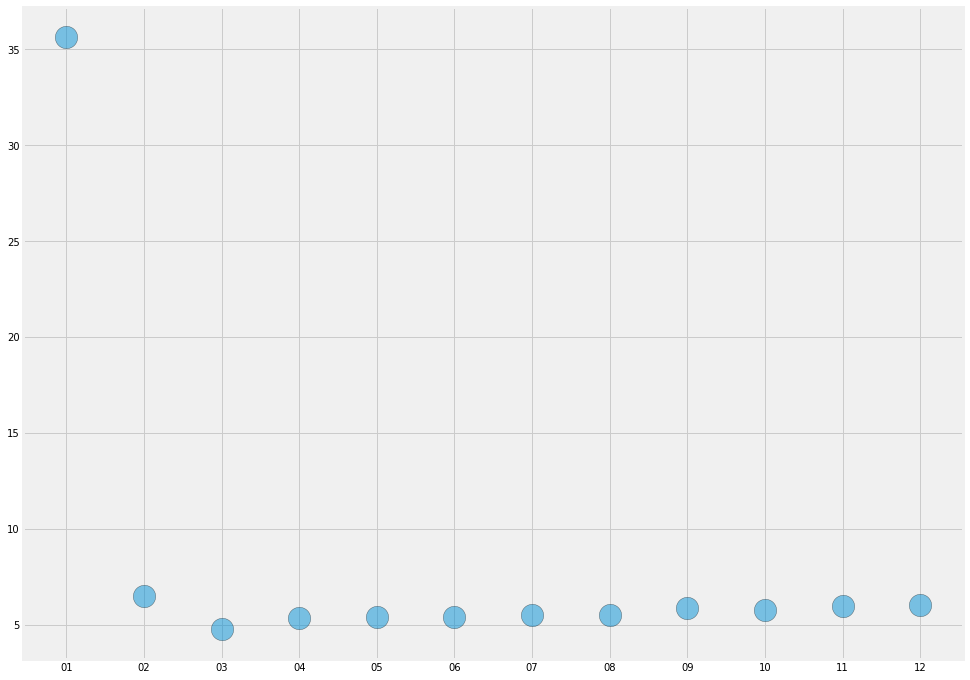

In [34]:
plt.figure(figsize=(15, 12))
plt.scatter(percentage_df.index, 
    percentage_df['percMonthly'], s=500, marker='o', edgecolors='black' , alpha = 0.50)



# BELOW CODE DOESN'T RUN

In [ ]:
results = chi_square_of_df_cols(percentage_df, 'percMonthly','numTotalMonthly')